<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/zad16_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
import os

In [8]:
meta_df = pd.read_csv('country_wise_latest.csv', dtype={
    'Country/Region': str,
    'Deaths': float,
    'WHO Region': str,



})

meta_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269.0,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144.0,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163.0,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52.0,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41.0,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [9]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    float64
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [10]:
root_path='../input/CORD-19-research-challenge'
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

0

In [11]:
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

In [12]:
import re
import pandas as pd

# Check if 'body_text' column exists
if 'body_text' not in meta_df.columns:
    # Handle the missing column (e.g., create an empty column)
    meta_df['body_text'] = ''

meta_df['body_text'] = meta_df['body_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

# Check if 'abstract' column exists
if 'abstract' not in meta_df.columns:
    # Handle the missing column (e.g., create an empty column)
    meta_df['abstract'] = ''

meta_df['abstract'] = meta_df['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))


In [13]:
from sklearn.feature_extraction.text import HashingVectorizer


hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# Assuming 'meta_df' is your DataFrame and 'body_text' is the column with text data
n_gram_all = meta_df['body_text'].apply(lambda x: x.split()).tolist() # Split each string into a list of words

# features matrix X
X = hvec.fit_transform(n_gram_all)

In [17]:
X.shape

(187, 4096)

Podział

In [14]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 149
X_test size: 38 



In [15]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 149
X_test size: 38 



In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=20)
X_embedded = tsne.fit_transform(X_train)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 149 samples in 0.001s...
[t-SNE] Computed neighbors for 149 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 149 / 149
[t-SNE] Mean sigma: 0.000000


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split # import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer

meta_df = pd.read_csv('country_wise_latest.csv')
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# Check the column names available in the DataFrame
print(meta_df.columns)

# Assuming the correct column name is 'text' based on the available columns
n_gram_all = meta_df['Country/Region'].apply(lambda x: x.split()).tolist()
X = hvec.fit_transform(n_gram_all)

# Assuming X is defined previously
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42) # create X_train

k = 10
kmeans = KMeans(n_clusters=k, verbose=10)
y_pred = kmeans.fit_predict(X_train)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
Initialization complete
Iteration 0, inertia 272.2971910460355.
Iteration 1, inertia 136.3928869189168.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 276.1835034190723.
Iteration 1, inertia 137.96254336829142.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 272.51597064551777.
Iteration 1, inertia 136.87285161867624.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 268.10175708314466.
Iteration 1, inertia 135.29495917009058.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 272.2462241244067.
Iteration 1, iner

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 276.0.
Iteration 1, inertia 137.88236931804093.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 271.5815892851931.
Iteration 1, inertia 136.62886566040407.
Converged at iteration 1: strict convergence.


In [15]:
y_train = y_pred

In [16]:
y_test = kmeans.predict(X_test)

In [22]:
import seaborn as sns
from sklearn.manifold import TSNE # import TSNE

tsne = TSNE(verbose=1, perplexity=20) # define tsne

y_embedded = tsne.fit_transform(X_train)
sns.set(rc={'figure.figsize':(15,15)})

palette = sns.color_palette("bright", len(set(y_pred)))

sns.scatterplot(X_embedded[:,0], y_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 149 samples in 0.003s...
[t-SNE] Computed neighbors for 149 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 149 / 149
[t-SNE] Mean sigma: 0.056067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.056259
[t-SNE] KL divergence after 1000 iterations: 0.561809


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 3 keyword-only arguments) were given

In [24]:
from sklearn.cluster import MiniBatchKMeans

k = 10
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [25]:
y = y_pred

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 187 samples in 0.001s...
[t-SNE] Computed neighbors for 187 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 187 / 187
[t-SNE] Mean sigma: 0.055786
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.415527
[t-SNE] KL divergence after 1000 iterations: 0.707826


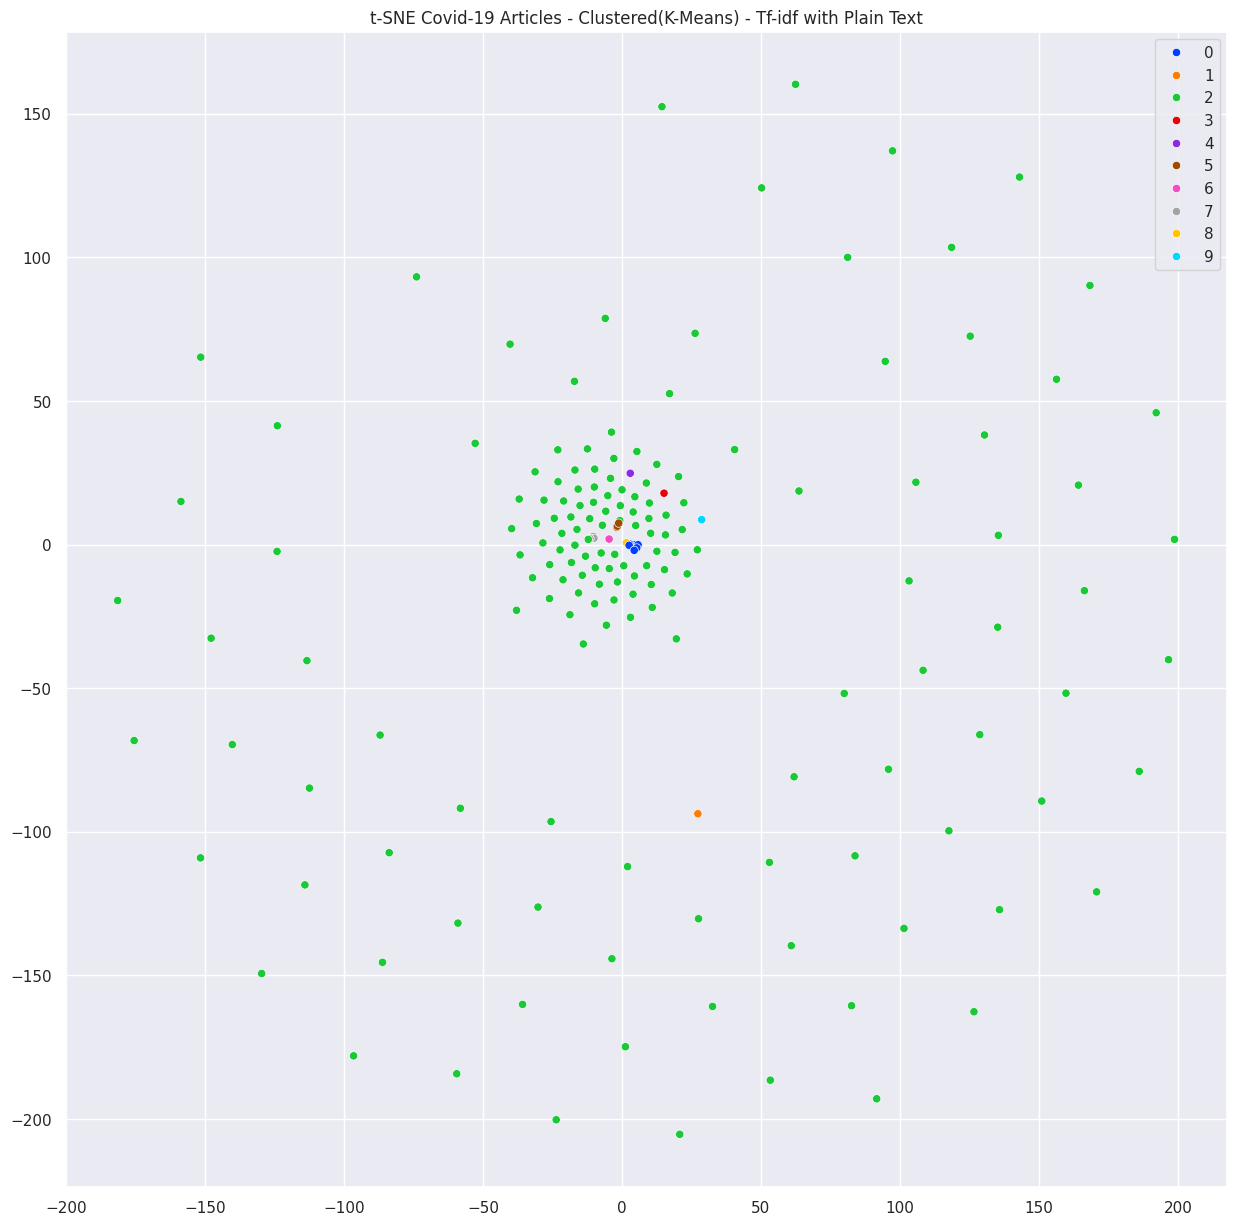

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,15)})

palette = sns.color_palette("bright", len(set(y)))

sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered(K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/t-sne_covid19_label_TFID.png")
plt.show()

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.toarray())

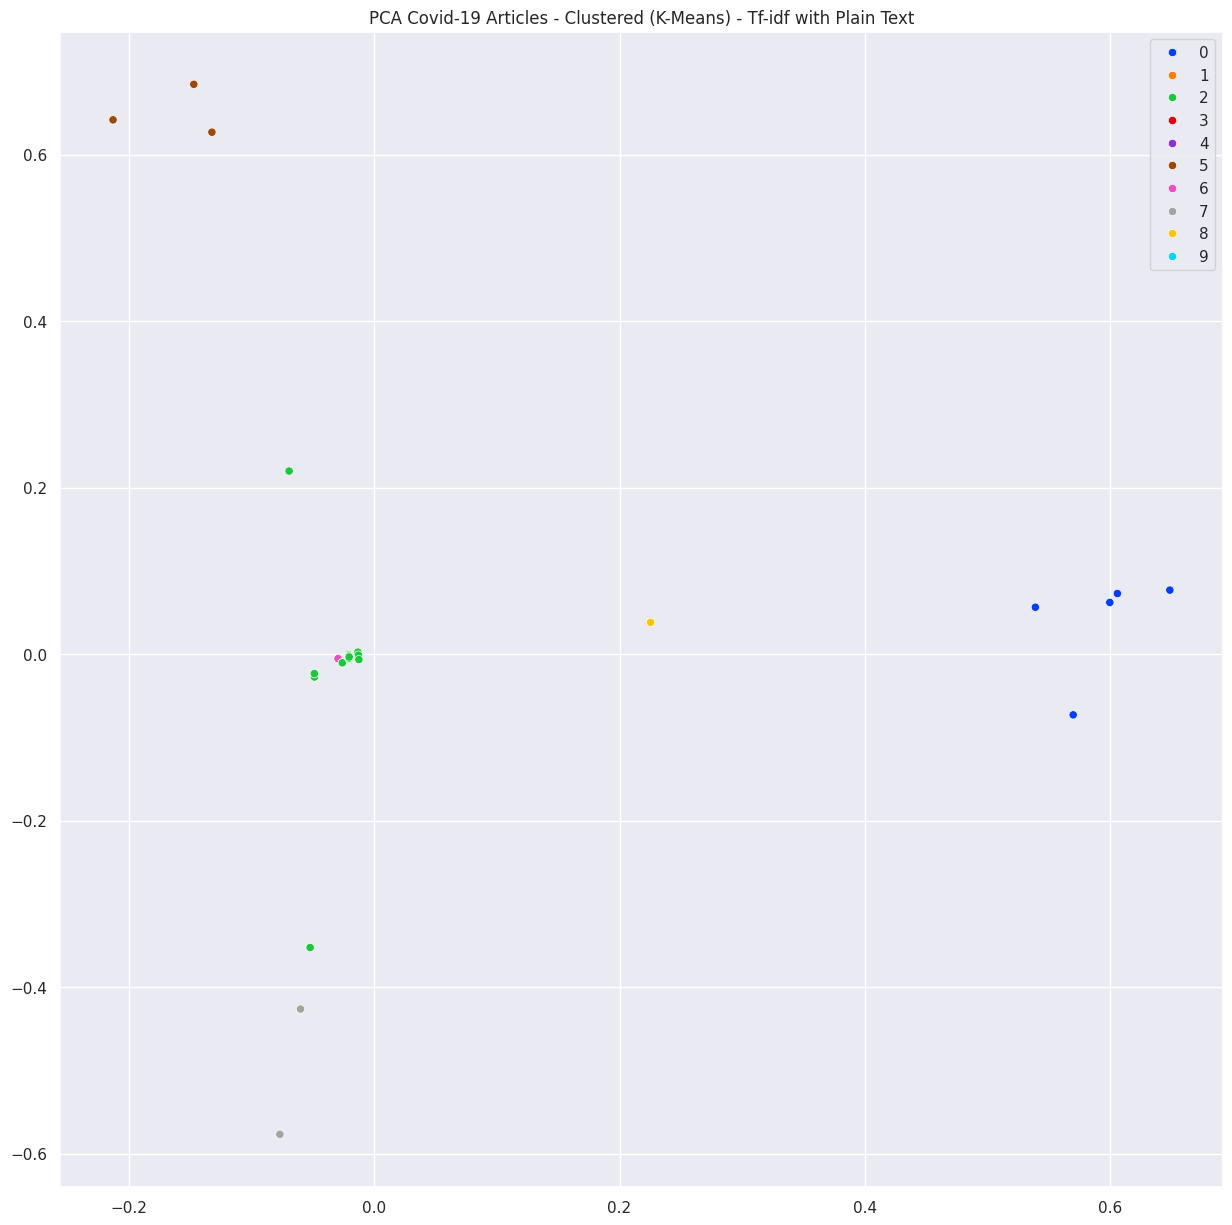

In [32]:
sns.set(rc={'figure.figsize':(15,15)})

palette = sns.color_palette("bright", len(set(y)))


sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y, legend='full', palette=palette)
plt.title("PCA Covid-19 Articles - Clustered (K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()

A teraz wszystko razem na 3D

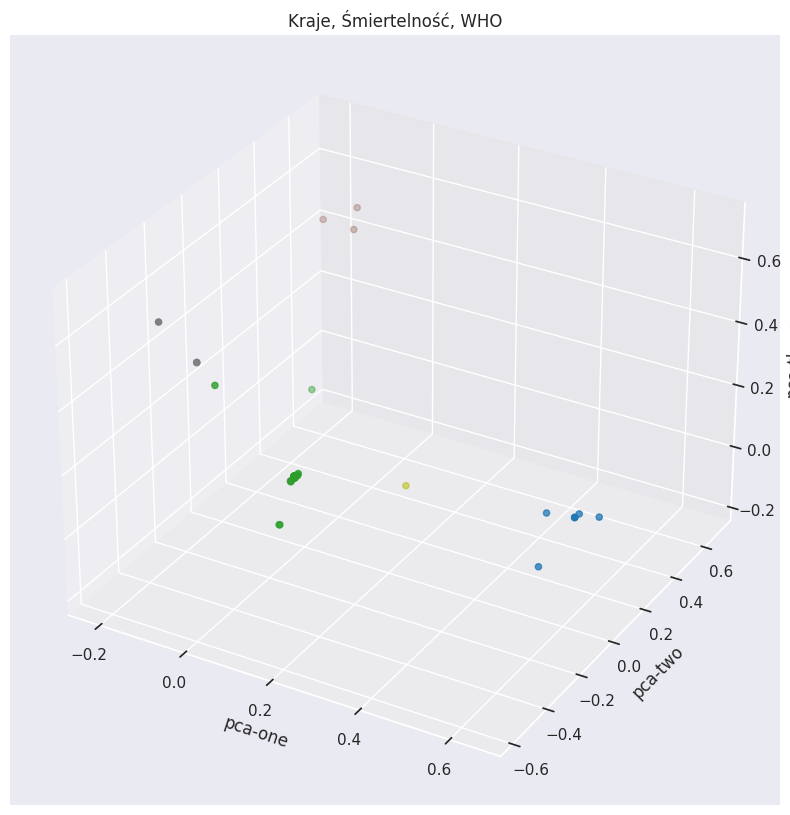

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d') #

ax.scatter(
    xs=pca_result[:,0],
    ys=pca_result[:,1],
    zs=pca_result[:,2],
    c=y,
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title("Kraje, Śmiertelność, WHO")
# plt.savefig("plots/pca_covid19_label_TFID_3d.png")
plt.show()